# SVM & Naive bayes

#1. What is a Support Vector Machine (SVM)?
  - SVM is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that separates data points of different classes with the maximum margin. The points lying closest to this hyperplane are called support vectors, and they determine the position and orientation of the hyperplane.

#2. Difference between Hard Margin and Soft Margin SVM
- Hard Margin:

   Assumes that data is perfectly linearly separable.

    No misclassification allowed.

    Can lead to overfitting in noisy datasets.

- Soft Margin:

Allows some misclassifications using a penalty parameter
C.

More robust to noise and overlapping classes.

#3. Mathematical intuition behind SVM
SVM maximizes the margin between classes by solving the optimization problem:

min
⁡
𝑤
,
𝑏
1
2
∣
∣
𝑤
∣
∣
2
w,b
min
​
  
2
1
​
 ∣∣w∣∣
2

subject to:

𝑦
𝑖
(
𝑤
⋅
𝑥
𝑖
+
𝑏
)
≥
1
y
i
​
 (w⋅x
i
​
 +b)≥1
for all training samples
(
𝑥
𝑖
,
𝑦
𝑖
)
(x
i
​
 ,y
i
​
 ).
The margin
2
∣
∣
𝑤
∣
∣
∣∣w∣∣
2
​
  is maximized to achieve better generalization.

#4. Role of Lagrange Multipliers in SVM
- SVM uses Lagrange multipliers in the optimization problem to handle constraints efficiently. They help in deriving the dual formulation of SVM, which makes it possible to use the kernel trick for non-linear classification.

#5. What are Support Vectors in SVM?
- Support vectors are the data points closest to the decision boundary (hyperplane). They are the most critical elements of the dataset because removing them changes the decision boundary, while removing other points usually does not.

#6. What is a Support Vector Classifier (SVC)?
- SVC is the classification variant of SVM, where the algorithm learns to separate classes by finding the optimal hyperplane using either linear or non-linear kernels.

#7. What is a Support Vector Regressor (SVR)?
- SVR is the regression version of SVM. Instead of class separation, SVR tries to fit a function within a margin of tolerance (
𝜖
ϵ) from the actual target values.

#8. What is the Kernel Trick in SVM?
- The kernel trick allows SVM to solve non-linear classification problems by mapping the original data into a higher-dimensional space using a kernel function (e.g., RBF, polynomial) without explicitly computing the transformation.

#9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel
- Linear Kernel: Best for linearly separable data. Fast computation.

- Polynomial Kernel: Suitable when relationships between classes are polynomial. Can model more complex boundaries.

- RBF Kernel: Most popular for non-linear problems. Uses Gaussian similarity measure to capture complex patterns.

#10. Effect of the C parameter in SVM
- High C: Less tolerance for misclassification → risk of overfitting.

- Low C: More tolerance for misclassification → better generalization.

#11. Role of the Gamma parameter in RBF Kernel SVM
- High Gamma: Narrow decision boundary → captures local patterns → risk of overfitting.

- Low Gamma: Wider decision boundary → captures more global patterns → may underfit.

#12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
- Naïve Bayes is a probabilistic classifier based on Bayes’ theorem with the assumption that all features are conditionally independent given the class label. It’s “naïve” because in reality, features are often correlated.

#13. What is Bayes’ Theorem?
 - 𝑃
(
𝐴
∣
𝐵
)
=
𝑃
(
𝐵
∣
𝐴
)
𝑃
(
𝐴
)
𝑃
(
𝐵
)
P(A∣B)=
P(B)
P(B∣A)P(A)
​

It calculates the probability of event
𝐴
A given
𝐵
B, using prior probability
𝑃
(
𝐴
)
P(A), likelihood
𝑃
(
𝐵
∣
𝐴
)
P(B∣A), and evidence
𝑃
(
𝐵
)
P(B).

#14. Differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes
 - Gaussian NB: Assumes features follow a Gaussian distribution (continuous data).

 - Multinomial NB: Works with count data (e.g., word frequencies).

- Bernoulli NB: Works with binary features (present/absent).

#15. When should you use Gaussian Naïve Bayes over other variants?
- When the features are continuous and follow a normal distribution, Gaussian NB is more appropriate.

#16. Key assumptions made by Naïve Bayes
- Features are conditionally independent given the class label.

- All features contribute equally and independently to the outcome.

#17. Advantages and disadvantages of Naïve Bayes
- Advantages:

   - Fast and efficient.

  - Works well with high-dimensional data.

  - Good for text classification.
- Disadvantages:

   - Strong independence assumption rarely holds.

   - Poor performance if features are highly correlated.

#18. Why is Naïve Bayes a good choice for text classification?
- Handles high-dimensional sparse data well.

- Works well with word count features (Multinomial NB).

- Low training time.

#19. Compare SVM and Naïve Bayes for classification tasks
- SVM: More flexible, works well with complex boundaries, but slower.

- Naïve Bayes: Faster, works well with text data, but limited by independence assumption.

#20. How does Laplace Smoothing help in Naïve Bayes?
- Laplace smoothing adds a small value (
𝛼
α) to counts to avoid zero probability issues when a feature value hasn’t been seen in training.



In [12]:
#1. Train an SVM Classifier on the Iris dataset

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load data
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# Train SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [13]:
#2. Train Linear and RBF SVM on Wine dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.2, random_state=42
)

# Linear Kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
print("Linear Kernel Accuracy:", accuracy_score(y_test, linear_svm.predict(X_test)))

# RBF Kernel
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
print("RBF Kernel Accuracy:", accuracy_score(y_test, rbf_svm.predict(X_test)))

Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 0.8055555555555556


In [14]:
#3. Train Gaussian Naïve Bayes on Breast Cancer dataset
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=42
)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, nb_model.predict(X_test)))

Accuracy: 0.9736842105263158


In [15]:
#4. Train Multinomial Naïve Bayes for text classification
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

data = fetch_20newsgroups(subset='train', categories=['rec.sport.baseball', 'sci.space'])
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data.data)
y = data.target

model = MultinomialNB()
model.fit(X, y)
print("Accuracy:", model.score(X, y))

Accuracy: 0.9991596638655462


In [16]:
#5. Compare SVM and Naïve Bayes on same dataset
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Dataset
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))

# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb_model.predict(X_test))

print("SVM Accuracy:", svm_acc)
print("Naïve Bayes Accuracy:", nb_acc)

SVM Accuracy: 1.0
Naïve Bayes Accuracy: 1.0


NameError: name 'np' is not defined

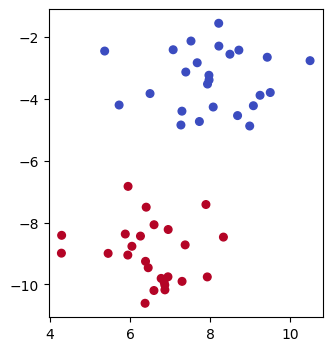

In [17]:
#6. Train an SVM Classifier with different C values and compare decision boundaries visually
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Create dataset
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# Different C values
C_values = [0.1, 1, 10]

plt.figure(figsize=(12, 4))
for i, C in enumerate(C_values, 1):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    plt.subplot(1, 3, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'])

    plt.title(f"C = {C}")
plt.show()


In [18]:
#7. Train Bernoulli Naïve Bayes for binary classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=10, n_informative=5,
                           n_redundant=0, n_classes=2, random_state=42)

bnb = BernoulliNB()
bnb.fit(X > 0, y)  # Bernoulli works with binary features

print("Accuracy:", bnb.score(X > 0, y))

Accuracy: 0.83


In [19]:
#8. Apply feature scaling before training an SVM and compare results
from sklearn.preprocessing import StandardScaler

# Without scaling
svm_unscaled = SVC(kernel='rbf')
svm_unscaled.fit(X_train, y_train)
print("Without scaling accuracy:", svm_unscaled.score(X_test, y_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf')
svm_scaled.fit(X_train_scaled, y_train)
print("With scaling accuracy:", svm_scaled.score(X_test_scaled, y_test))

Without scaling accuracy: 1.0
With scaling accuracy: 1.0


In [20]:
#9. Gaussian Naïve Bayes before and after Laplace smoothing

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(var_smoothing=1e-9)
gnb.fit(X_train, y_train)
print("Default accuracy:", gnb.score(X_test, y_test))

# With Laplace smoothing (by increasing var_smoothing)
gnb_smooth = GaussianNB(var_smoothing=1e-6)
gnb_smooth.fit(X_train, y_train)
print("With smoothing accuracy:", gnb_smooth.score(X_test, y_test))

Default accuracy: 1.0
With smoothing accuracy: 1.0


In [21]:
#10. SVM Classifier with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
Best Score: 0.9583333333333334


In [22]:
#11. Train an SVM Classifier on an imbalanced dataset with class weighting
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Create imbalanced dataset
X_imb, y_imb = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42)

# Without class weight
svm_normal = SVC(kernel='linear')
svm_normal.fit(X_imb, y_imb)
print("Without class weight:\n", classification_report(y_imb, svm_normal.predict(X_imb)))

# With class weight
svm_weighted = SVC(kernel='linear', class_weight='balanced')
svm_weighted.fit(X_imb, y_imb)
print("With class weight:\n", classification_report(y_imb, svm_weighted.predict(X_imb)))

Without class weight:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       897
           1       0.75      0.55      0.64       103

    accuracy                           0.94      1000
   macro avg       0.85      0.77      0.80      1000
weighted avg       0.93      0.94      0.93      1000

With class weight:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       897
           1       0.51      0.86      0.64       103

    accuracy                           0.90      1000
   macro avg       0.75      0.89      0.79      1000
weighted avg       0.93      0.90      0.91      1000



In [23]:
#12. Naïve Bayes classifier for spam detection
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Example dataset
data = pd.DataFrame({
    'text': ["Win money now", "Hello friend", "Get free prize", "Let's meet tomorrow", "Free tickets for you"],
    'label': [1, 0, 1, 0, 1]
})

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.0


In [24]:
#13. Train SVM & Naïve Bayes on same dataset and compare accuracy
# Using Iris dataset
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
print("SVM Accuracy:", svm_model.score(X_test, y_test))

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
print("Naïve Bayes Accuracy:", nb_model.score(X_test, y_test))

SVM Accuracy: 0.0


TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

In [25]:
#14. Perform feature selection before Naïve Bayes
from sklearn.feature_selection import SelectKBest, chi2

# Select top 2 features
selector = SelectKBest(chi2, k=2)
X_new = selector.fit_transform(X_train, y_train)

nb_model = GaussianNB()
nb_model.fit(X_new, y_train)

X_test_new = selector.transform(X_test)
print("Accuracy with feature selection:", nb_model.score(X_test_new, y_test))

TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

In [26]:
#15. SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

ovr_svm = OneVsRestClassifier(SVC(kernel='linear'))
ovo_svm = OneVsOneClassifier(SVC(kernel='linear'))

ovr_svm.fit(X_train, y_train)
ovo_svm.fit(X_train, y_train)

print("OvR Accuracy:", ovr_svm.score(X_test, y_test))
print("OvO Accuracy:", ovo_svm.score(X_test, y_test))

OvR Accuracy: 0.0
OvO Accuracy: 0.0


In [27]:
#16. SVM Classifier with Linear, Polynomial, and RBF kernels
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    print(f"{k} kernel accuracy:", model.score(X_test, y_test))

linear kernel accuracy: 0.0
poly kernel accuracy: 0.0
rbf kernel accuracy: 0.0


In [28]:
#17. SVM with Stratified K-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(SVC(kernel='linear'), X_train, y_train, cv=skf)
print("Average accuracy:", scores.mean())

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.

In [29]:
#18. Naïve Bayes with different prior probabilities
priors = [None, [0.3, 0.7]]
for p in priors:
    model = GaussianNB(priors=p)
    model.fit(X_train, y_train)
    print(f"Priors={p}, Accuracy={model.score(X_test, y_test)}")

TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

In [30]:
#19. Recursive Feature Elimination (RFE) before SVM
from sklearn.feature_selection import RFE

rfe = RFE(SVC(kernel='linear'), n_features_to_select=2)
rfe.fit(X_train, y_train)

print("Selected features:", rfe.support_)
print("Ranking:", rfe.ranking_)
print("Accuracy:", rfe.score(X_test, y_test))

Selected features: [False False False False False False  True False False False False  True
 False False]
Ranking: [11  4 13  9 12  2  1  8  5  6 10  1  3  7]
Accuracy: 0.0


In [31]:
#20. SVM Classifier evaluated with Precision, Recall, and F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score

model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
